In [6]:
import matplotlib.pyplot as plt
import numpy as np
import json
import csv

# Visualise Monopolotron winrate

In [25]:
def load_game_hist(path: str) -> np.array:
    with open(path) as f:
        hist = csv.reader(f, delimiter=',')
        return np.array(next(hist)).astype(int)

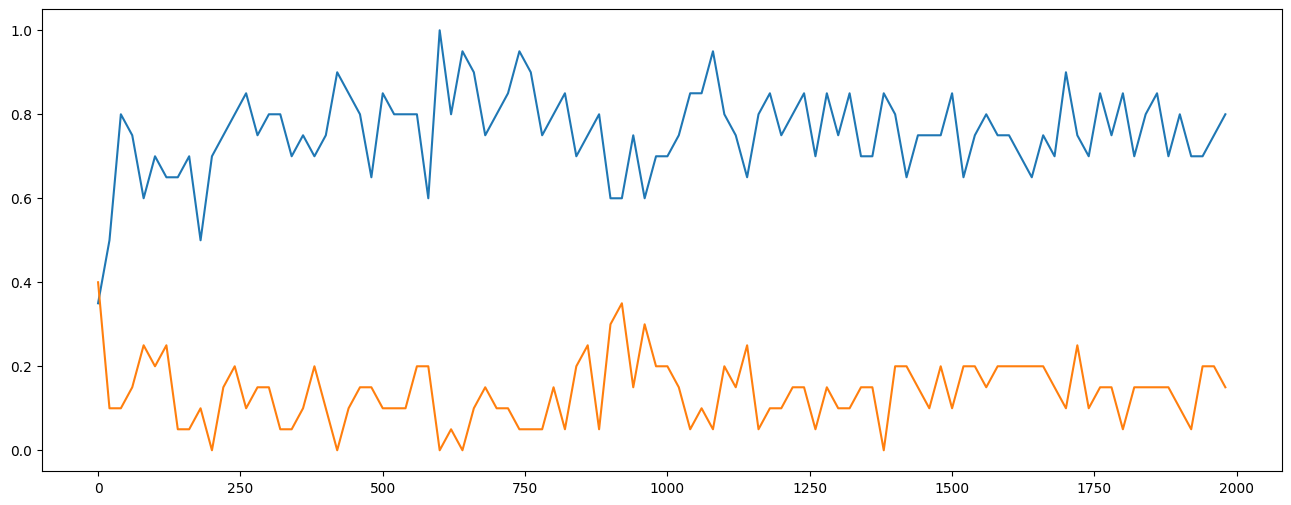

In [34]:
hist = load_game_hist('train_hist16.csv')

chunk_samples = 20
chunks = len(hist) // chunk_samples
epochs = np.arange(chunks) * chunk_samples

wins_chunk = np.zeros(chunks)
losses_chunk = np.zeros(chunks)

for c in range(chunks):
    wins_chunk[c] = np.mean(np.maximum(hist[c*chunk_samples : (c + 1)*chunk_samples], 0))
    losses_chunk[c] = -np.mean(np.minimum(hist[c*chunk_samples : (c + 1)*chunk_samples], 0))

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(epochs, wins_chunk, label='win rate in chunk')
ax.plot(epochs, losses_chunk, label='loss rate in chunk')

plt.show()